# Imports and Setup

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

df_full = pd.read_csv('data/players_data-2024_2025.csv')

# Goal
To identify and analyze key patterns, performance trends, and player profiles across the top European football leagues for the 2024-2025 season.


# Data Sources
The data is sourced from: [Football Players Stats (2024-2025)](https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025?resource=download)
You can also find the dataset in my repository, by looking in the *data* folder.

# Data inspection

In [130]:
print("\nGeneral information about the DataFrame:")
df_full.info()

print("\nStatistical summary of the numerical columns:")
print(df_full.describe())

print("\nCount of null values ​​per column (top 20 with most nulls):")
print(df_full.isnull().sum().sort_values(ascending=False).head(20))


General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 267 entries, Rk to AvgDist
dtypes: float64(111), int64(121), object(35)
memory usage: 5.8+ MB

Statistical summary of the numerical columns:
                Rk          Age         Born           MP       Starts  \
count  2854.000000  2846.000000  2846.000000  2854.000000  2854.000000   
mean   1427.500000    25.018974  1998.637034    19.024177    13.505256   
std     824.023159     4.491624     4.497922    11.510177    11.331036   
min       1.000000    15.000000  1982.000000     1.000000     0.000000   
25%     714.250000    22.000000  1996.000000     9.000000     3.000000   
50%    1427.500000    25.000000  1999.000000    20.000000    11.000000   
75%    2140.750000    28.000000  2002.000000    30.000000    23.000000   
max    2854.000000    41.000000  2008.000000    38.000000    38.000000   

               Min          90s          Gls          Ast          

# Data cleaning and subetting


In [131]:

df_full['90s'] = df_full['90s'].replace(0, np.nan)

df_full.dropna(subset=['90s'], inplace=True)

df_full['Gls_per_90'] = df_full['Gls'] / df_full['90s']
df_full['Ast_per_90'] = df_full['Ast'] / df_full['90s']
df_full['G+A_per_90'] = df_full['G+A'] / df_full['90s']
df_full['xG_per_90'] = df_full['xG'] / df_full['90s']
df_full['xA_per_90'] = df_full['xA'] / df_full['90s']
df_full['Sh_per_90'] = df_full['Sh'] / df_full['90s']
df_full['SoT_per_90'] = df_full['SoT'] / df_full['90s'] 
df_full['KP_per_90'] = df_full['KP'] / df_full['90s'] 
df_full['PrgP_per_90'] = df_full['PrgP'] / df_full['90s']
df_full['Tkl_per_90'] = df_full['Tkl'] / df_full['90s'] 
df_full['Int_per_90'] = df_full['Int'] / df_full['90s'] 
df_full['Clr_per_90'] = df_full['Clr'] / df_full['90s'] 

if 'GA_per_90' not in df_full.columns:
    df_full['GA_per_90'] = df_full['GA'] / df_full['90s']
if 'Saves_per_90' not in df_full.columns:
    df_full['Saves_per_90'] = df_full['Saves'] / df_full['90s']
if 'CS_per_90' not in df_full.columns:
    df_full['CS_per_90'] = df_full['CS'] / df_full['90s']

print("Metric columns per 90 minutes created and rows without relevant '90s' removed.")
print(df_full[['Player', '90s', 'Gls', 'Gls_per_90', 'Ast', 'Ast_per_90', 'GA', 'GA_per_90']].head())

Metric columns per 90 minutes created and rows without relevant '90s' removed.
             Player   90s  Gls  Gls_per_90  Ast  Ast_per_90  GA  GA_per_90
0        Max Aarons   1.0    0         0.0    0         0.0 NaN        NaN
1        Max Aarons   1.3    0         0.0    0         0.0 NaN        NaN
2    Rodrigo Abajas   0.7    0         0.0    0         0.0 NaN        NaN
3    James Abankwah   1.0    0         0.0    0         0.0 NaN        NaN
5  Yunis Abdelhamid  11.5    0         0.0    0         0.0 NaN        NaN


# Data Exploration
## Goal-scoring Performance
I will analyze players' goal-scoring ability from different perspectives: their efficiency per playing time, their total goal volume, and the relationship between their expected and actual goals.
### Goal-scoring Efficiency (Gls_per_90)
I identify players with the best average goals per 90 minutes, considering only those with a minimum of 720 minutes (8 90s) played to ensure statistical relevance.

Top 10 Players by Goals per 90 Minutes (minimum 8 90s played):
                  Player            Squad           Comp Pos  Gls  Gls_per_90  \
2539   Alexander Sørloth  Atlético Madrid     es La Liga  FW   20    1.149425   
2369       Patrik Schick       Leverkusen  de Bundesliga  FW   21    1.122995   
697      Ousmane Dembélé        Paris S-G     fr Ligue 1  FW   21    1.093750   
1317          Harry Kane    Bayern Munich  de Bundesliga  FW   26    0.981132   
1691       Kylian Mbappé      Real Madrid     es La Liga  FW   31    0.959752   
330         Mika Biereth           Monaco     fr Ligue 1  FW   13    0.955882   
2201       Mateo Retegui         Atalanta     it Serie A  FW   25    0.943396   
1631       Omar Marmoush   Eint Frankfurt  de Bundesliga  FW   15    0.931677   
2514    Cristhian Stuani           Girona     es La Liga  FW   11    0.916667   
1483  Robert Lewandowski        Barcelona     es La Liga  FW   27    0.912162   

       90s  
2539  17.4  
2369  18.7  
697   

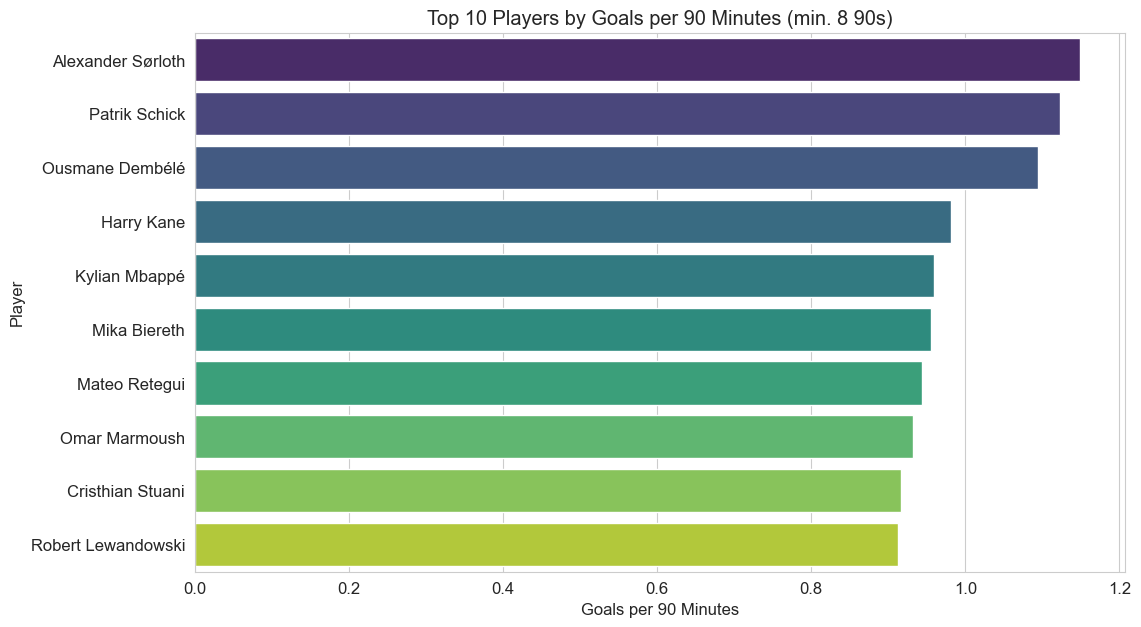

In [132]:
min_90s_goleadores = 8

df_goleadores_eficiencia = df_full[df_full['90s'] >= min_90s_goleadores].copy()

df_goleadores_eficiencia.dropna(subset=['Gls_per_90'], inplace=True)

top_scorers_efficiency = df_goleadores_eficiencia.sort_values(by='Gls_per_90', ascending=False).head(10)

print(f"Top 10 Players by Goals per 90 Minutes (minimum {min_90s_goleadores} 90s played):")
print(top_scorers_efficiency[['Player', 'Squad', 'Comp', 'Pos', 'Gls', 'Gls_per_90', '90s']])

plt.figure(figsize=(12, 7))

sns.barplot(x='Gls_per_90', y='Player', data=top_scorers_efficiency, hue='Player', palette='viridis', legend=False)

plt.title(f'Top 10 Players by Goals per 90 Minutes (min. {min_90s_goleadores} 90s)')

plt.xlabel('Goals per 90 Minutes')

plt.ylabel('Player')

plt.show()

### Total Goals (Gls Total)
I identify the 10 players who have scored the highest total number of goals so far this season.


Top 10 Overall Goal-scorers (Total Goals):
                  Player            Squad                Comp    Pos  Gls  \
1691       Kylian Mbappé      Real Madrid          es La Liga     FW   31   
2304       Mohamed Salah        Liverpool  eng Premier League     FW   29   
1483  Robert Lewandowski        Barcelona          es La Liga     FW   27   
1317          Harry Kane    Bayern Munich       de Bundesliga     FW   26   
2201       Mateo Retegui         Atalanta          it Serie A     FW   25   
1219      Alexander Isak    Newcastle Utd  eng Premier League     FW   23   
1109      Erling Haaland  Manchester City  eng Premier League     FW   22   
2369       Patrik Schick       Leverkusen       de Bundesliga     FW   21   
1060     Mason Greenwood        Marseille          fr Ligue 1  FW,MF   21   
697      Ousmane Dembélé        Paris S-G          fr Ligue 1     FW   21   

       90s  
1691  32.3  
2304  37.5  
1483  29.6  
1317  26.5  
2201  26.5  
1219  30.6  
1109  30.4  
2369

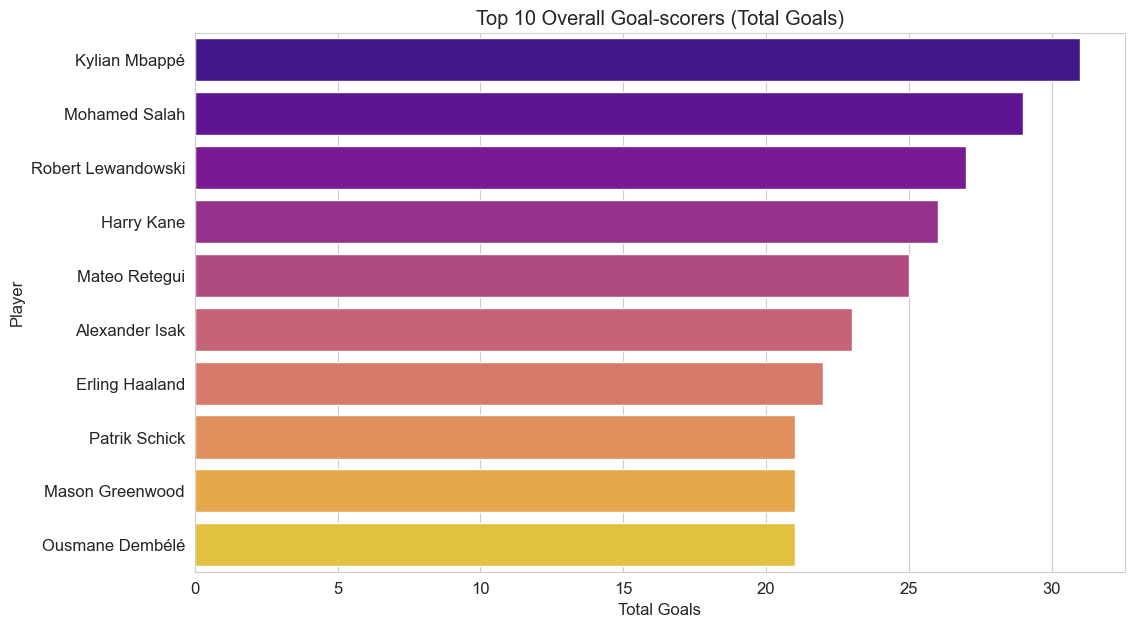

In [146]:
# Ensure 'Gls' column does not have NaNs for this part
df_full.dropna(subset=['Gls'], inplace=True)

top_total_scorers = df_full.sort_values(by='Gls', ascending=False).head(10)

print("\nTop 10 Overall Goal-scorers (Total Goals):")
print(top_total_scorers[['Player', 'Squad', 'Comp', 'Pos', 'Gls', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Gls', y='Player', data=top_total_scorers, hue='Player', palette='plasma', legend=False)
plt.title('Top 10 Overall Goal-scorers (Total Goals)')
plt.xlabel('Total Goals')
plt.ylabel('Player')
plt.show()

### Gls vs. xG Analysis
I compare forwards' goals scored with their expected goals (xG) to evaluate their finishing ability. A positive difference (Gls > xG) suggests a great finisher, while a negative difference (Gls < xG) could indicate bad luck or finishing issues.

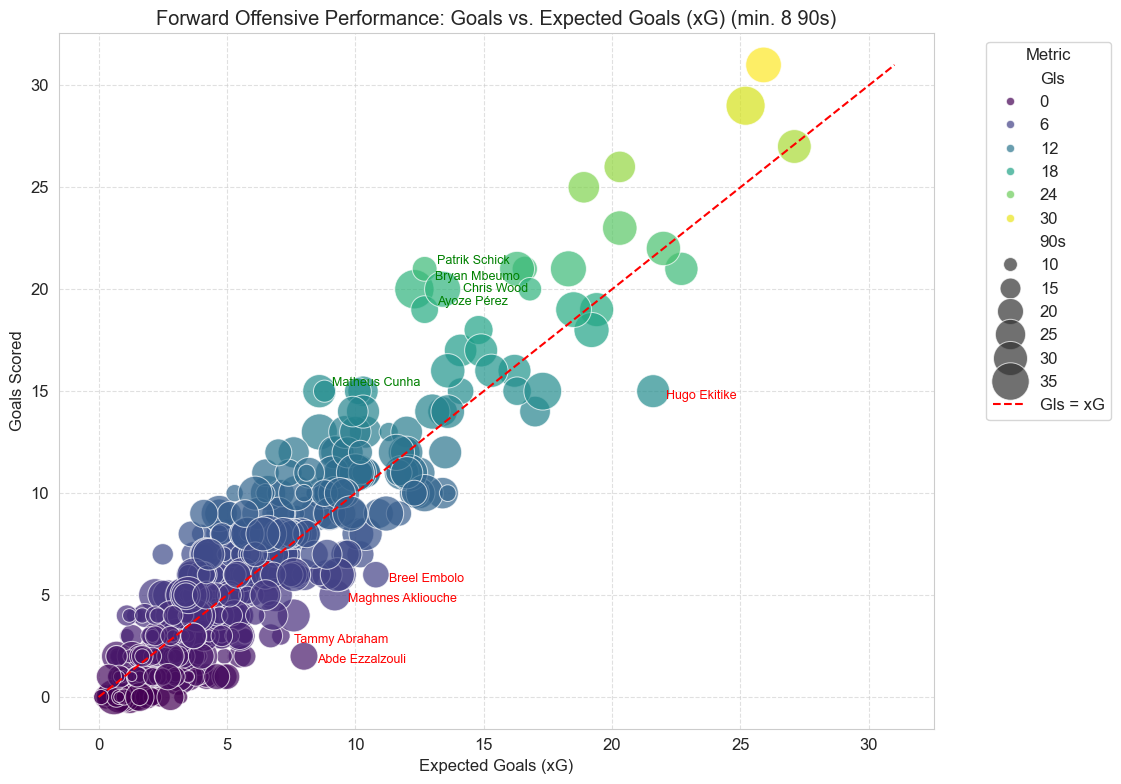

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_fw = df_full[df_full['Pos'].str.contains('FW', na=False)].copy()

df_fw_filtered = df_fw[df_fw['90s'] >= min_90s_fw].copy()

df_fw_filtered.dropna(subset=['xG', 'Gls'], inplace=True)

df_fw_filtered['Gls_xG_Diff'] = df_fw_filtered['Gls'] - df_fw_filtered['xG']

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='xG',
    y='Gls',
    size='90s',
    sizes=(50, 800),
    hue='Gls',
    palette='viridis',
    data=df_fw_filtered,
    legend='brief',
    alpha=0.7
)

max_val_xg_gls = max(df_fw_filtered['xG'].max(), df_fw_filtered['Gls'].max())
plt.plot([0, max_val_xg_gls], [0, max_val_xg_gls], color='red', linestyle='--', label='Gls = xG')

plt.title(f'Forward Offensive Performance: Goals vs. Expected Goals (xG) (min. {min_90s_fw} 90s)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')

num_players_to_label = 5

top_overperformers = df_fw_filtered.nlargest(num_players_to_label, 'Gls_xG_Diff')
top_underperformers = df_fw_filtered.nsmallest(num_players_to_label, 'Gls_xG_Diff')

players_to_label_fw = pd.concat([top_overperformers, top_underperformers]).drop_duplicates()

# --- START OF OVERLAP CORRECTION ---
for i, row in players_to_label_fw.iterrows():
    x_offset = 0.5
    y_offset = 0.1

    if row['Player'] == 'Bryan Mbeumo':
        x_offset = 0.8
        y_offset = 0.3
    elif row['Player'] == 'Chris Wood':
        x_offset = 0.8
        y_offset = -0.3
    elif row['Player'] == 'Mika Biereth':
        x_offset = 0.8
        y_offset = 0.2
    elif row['Player'] == 'Omar Marmoush':
        x_offset = 0.8
        y_offset = -0.2

    if row['Gls_xG_Diff'] > 0:
        text_color = 'green'
        ha = 'left'
        va = 'bottom'
    else:
        text_color = 'red'
        ha = 'left'
        va = 'top'

    plt.text(row['xG'] + x_offset, row['Gls'] + y_offset,
             row['Player'],
             fontsize=9,
             color=text_color,
             ha=ha,
             va=va)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

## Assisting Performance
I analyze players' ability to create goal-scoring opportunities, both in terms of efficiency per playing time and total assist volume, and how these metrics are distributed by league.

### Assisting Efficiency (Ast_per_90)
I identify players with the best average assists per 90 minutes, applying the same threshold of 8 90s played to ensure relevance.

Top 10 Players by Assists per 90 Minutes (minimum 8 90s played):
                 Player           Squad                Comp    Pos  Ast  \
1960      Michael Olise   Bayern Munich       de Bundesliga  FW,MF   15   
1631      Omar Marmoush  Eint Frankfurt       de Bundesliga     FW    9   
2299        Bukayo Saka         Arsenal  eng Premier League  FW,MF   10   
2612      Ferrán Torres       Barcelona          es La Liga  FW,MF    6   
541        Rayan Cherki            Lyon          fr Ligue 1  FW,MF   11   
2304      Mohamed Salah       Liverpool  eng Premier League     FW   18   
2023  Exequiel Palacios      Leverkusen       de Bundesliga     MF    6   
1221               Isco           Betis          es La Liga     MF    8   
2779      Florian Wirtz      Leverkusen       de Bundesliga  MF,FW   12   
1830       Jacob Murphy   Newcastle Utd  eng Premier League     FW   12   

      Ast_per_90   90s  
1960    0.579151  25.9  
1631    0.559006  16.1  
2299    0.520833  19.2  
2612    0

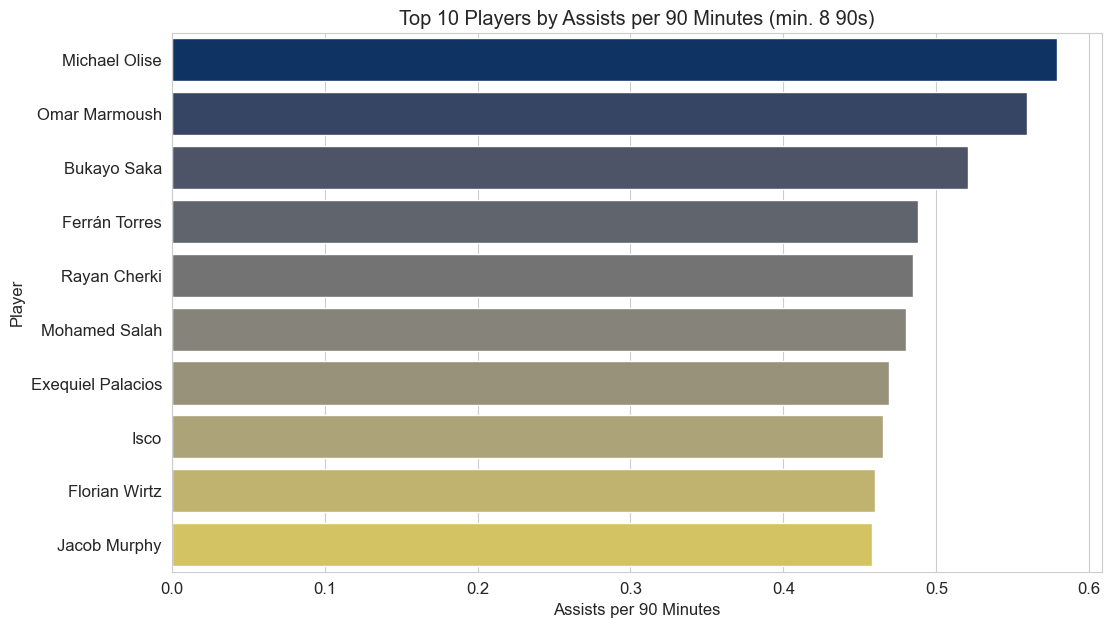

In [155]:
min_90s_assisters = 8

df_assisters_efficiency = df_full[df_full['90s'] >= min_90s_assisters].copy()
df_assisters_efficiency.dropna(subset=['Ast_per_90'], inplace=True)

top_assisters_efficiency = df_assisters_efficiency.sort_values(by='Ast_per_90', ascending=False).head(10)

print(f"Top 10 Players by Assists per 90 Minutes (minimum {min_90s_assisters} 90s played):")
print(top_assisters_efficiency[['Player', 'Squad', 'Comp', 'Pos', 'Ast', 'Ast_per_90', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Ast_per_90', y='Player', data=top_assisters_efficiency, hue='Player', palette='cividis', legend=False)
plt.title(f'Top 10 Players by Assists per 90 Minutes (min. {min_90s_assisters} 90s)')
plt.xlabel('Assists per 90 Minutes')
plt.ylabel('Player')
plt.show()

### Total Assists (Ast Totales)
I identify the 10 players who have provided the highest total number of assists so far this season.


Top 10 Overall Assisters (Total Assists):
                 Player            Squad                Comp    Pos  Ast   90s
2304      Mohamed Salah        Liverpool  eng Premier League     FW   18  37.5
1960      Michael Olise    Bayern Munich       de Bundesliga  FW,MF   15  25.9
2792       Lamine Yamal        Barcelona          es La Liga     FW   13  31.7
2779      Florian Wirtz       Leverkusen       de Bundesliga  MF,FW   12  26.1
1830       Jacob Murphy    Newcastle Utd  eng Premier League     FW   12  26.2
541        Rayan Cherki             Lyon          fr Ligue 1  FW,MF   11  22.7
829      Anthony Elanga  Nott'ham Forest  eng Premier League  FW,MF   11  27.8
1064     Vincenzo Grifo         Freiburg       de Bundesliga  FW,MF   11  27.0
2099      Gaëtan Perrin          Auxerre          fr Ligue 1  MF,FW   11  29.9
66    Maghnes Akliouche           Monaco          fr Ligue 1  FW,MF   10  26.7


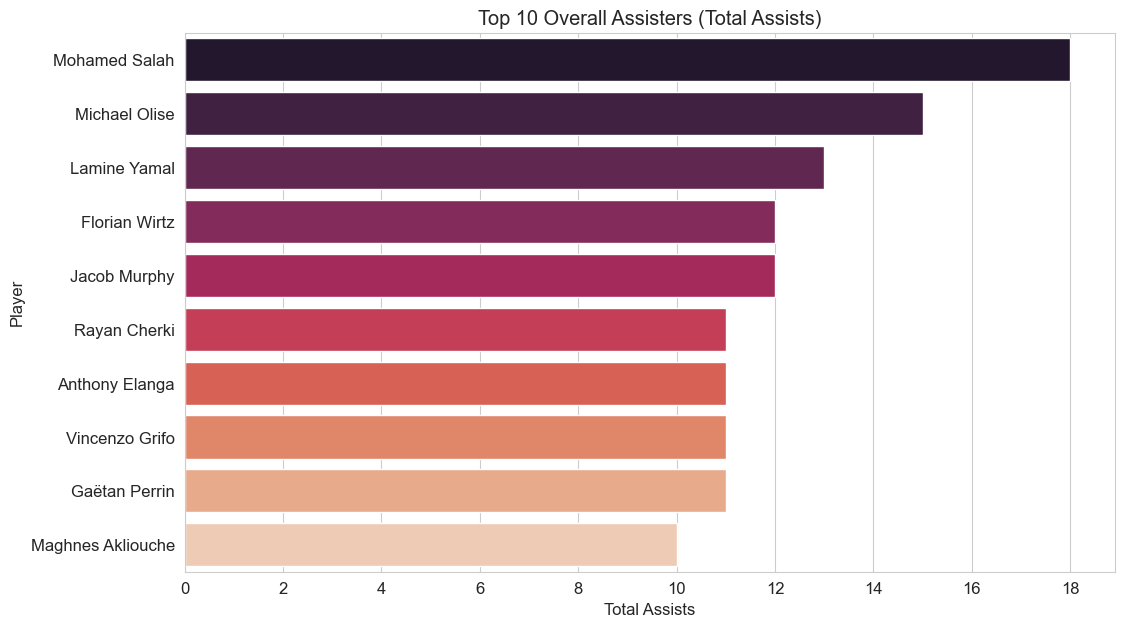

In [158]:
df_full.dropna(subset=['Ast'], inplace=True)

top_total_assisters = df_full.sort_values(by='Ast', ascending=False).head(10)

print("\nTop 10 Overall Assisters (Total Assists):")
print(top_total_assisters[['Player', 'Squad', 'Comp', 'Pos', 'Ast', '90s']])

plt.figure(figsize=(12, 7))
sns.barplot(x='Ast', y='Player', data=top_total_assisters, hue='Player', palette='rocket', legend=False)
plt.title('Top 10 Overall Assisters (Total Assists)')
plt.xlabel('Total Assists')
plt.ylabel('Player')

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

### Ast vs. xA Analysis
I analyze the relationship between actual assists (Ast) and expected assists (xA) to evaluate players' ability to convert goal-scoring opportunities into real assists.

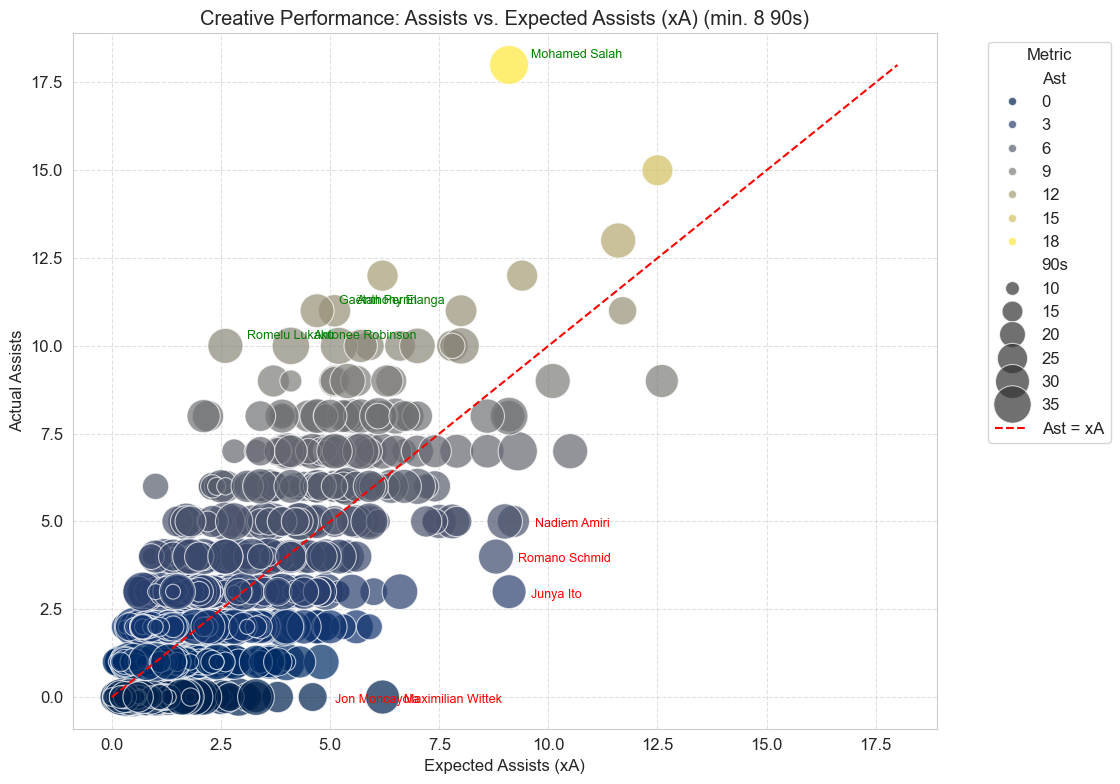

In [172]:
# Filter field players relevant for assists (exclude goalkeepers)
df_field_players = df_full[~df_full['Pos'].str.contains('GK', na=False)].copy()

min_90s_xA_Ast = 8 # Minimum 90s threshold for field players
df_field_filtered = df_field_players[df_field_players['90s'] >= min_90s_xA_Ast].copy()

df_field_filtered.dropna(subset=['xA', 'Ast'], inplace=True) # Remove NaNs in xA and Ast

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='xA',             # X-axis: Expected Assists
    y='Ast',            # Y-axis: Actual Assists
    size='90s',         # Point size: Represents 90s played
    sizes=(50, 800),
    hue='Ast',          # Point color: Gradient based on assists
    palette='cividis',
    data=df_field_filtered,
    legend='brief',
    alpha=0.7
)

# Add the Ast = xA reference line
max_val_xa_ast = max(df_field_filtered['xA'].max(), df_field_filtered['Ast'].max())
plt.plot([0, max_val_xa_ast], [0, max_val_xa_ast], color='red', linestyle='--', label='Ast = xA')

plt.title(f'Creative Performance: Assists vs. Expected Assists (xA) (min. {min_90s_xA_Ast} 90s)')
plt.xlabel('Expected Assists (xA)')
plt.ylabel('Actual Assists')

# Label the top 5 "overperformers" and top 5 "underperformers" in assists
df_field_filtered['Ast_xA_Diff'] = df_field_filtered['Ast'] - df_field_filtered['xA']
num_players_to_label_ast = 5

top_overperformers_ast = df_field_filtered.nlargest(num_players_to_label_ast, 'Ast_xA_Diff')
top_underperformers_ast = df_field_filtered.nsmallest(num_players_to_label_ast, 'Ast_xA_Diff')
players_to_label_ast = pd.concat([top_overperformers_ast, top_underperformers_ast]).drop_duplicates()

for i, row in players_to_label_ast.iterrows():
    x_offset = 0.5
    y_offset = 0.1
    if row['Ast_xA_Diff'] > 0:
        text_color = 'green'
        ha = 'left'
        va = 'bottom'
    else:
        text_color = 'red'
        ha = 'left'
        va = 'top'

    plt.text(row['xA'] + x_offset, row['Ast'] + y_offset,
             row['Player'],
             fontsize=9,
             color=text_color,
             ha=ha,
             va=va)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

### Assist Contribution by League
I visualize the total assists contributed by each league in the season, complementing the analysis of goal-scoring contribution.


Total Assists by League (2024-2025 Season):
Comp
eng Premier League    804
es La Liga            673
de Bundesliga         671
it Serie A            669
fr Ligue 1            612
Name: Ast, dtype: int64


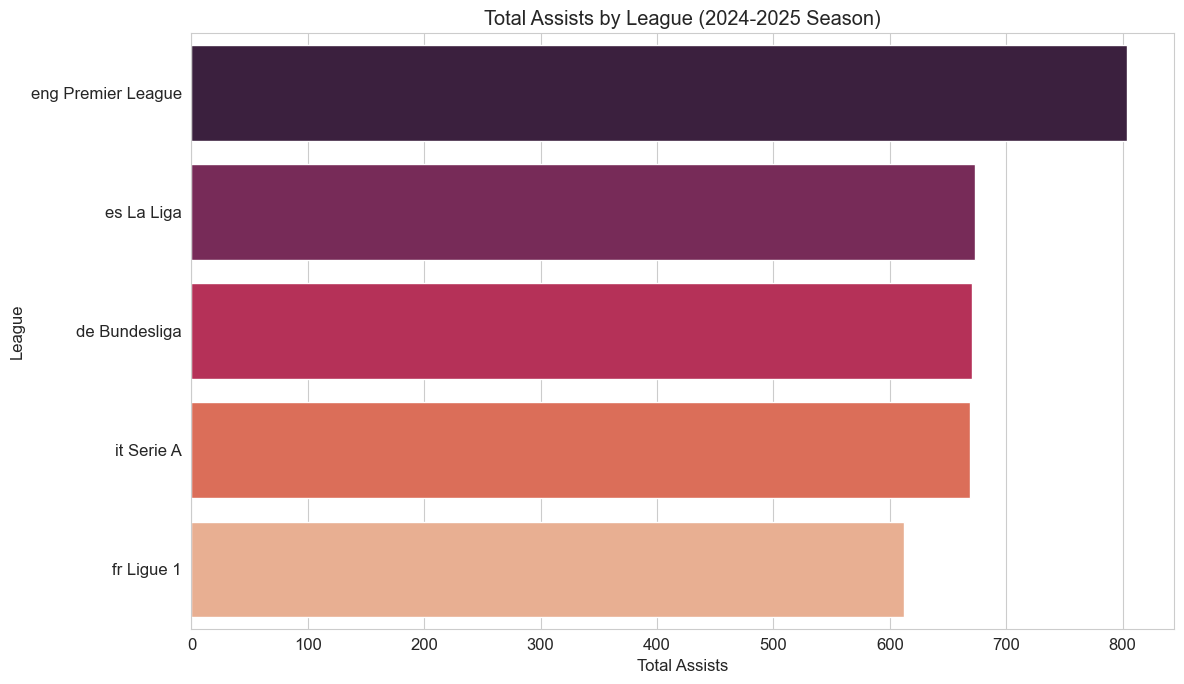

In [173]:
total_assists_by_league = df_full.groupby('Comp')['Ast'].sum().sort_values(ascending=False)

print("\nTotal Assists by League (2024-2025 Season):")
print(total_assists_by_league)

plt.figure(figsize=(12, 7))
sns.barplot(x=total_assists_by_league.values, y=total_assists_by_league.index, hue=total_assists_by_league.index, palette='rocket', legend=False)
plt.title('Total Assists by League (2024-2025 Season)')
plt.xlabel('Total Assists')
plt.ylabel('League')
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# Goalkeeper Analysis
Goalkeepers are a specialized position, and their performance is evaluated using distinct metrics. I will focus on their save efficiency, impact on goals conceded, and playing style.

In [176]:
df_gk = df_full[df_full['Pos'].str.contains('GK', na=False)].copy()

df_gk_filtered = df_gk[df_gk['90s'] >= min_90s_gk_analysis].copy()

df_gk_filtered.dropna(subset=['Save%', 'GA_per_90', 'SoT'], inplace=True)

print(f"Number of goalkeepers analyzed (minimum {min_90s_gk_analysis} 90s): {len(df_gk_filtered)}")
print("First rows of the filtered goalkeepers DataFrame with key metrics:")
print(df_gk_filtered[['Player', 'Squad', 'Comp', '90s', 'GA_per_90', 'Save%', 'Saves_per_90', 'CS', 'CS_per_90', '#OPA/90', 'Launch%', 'AvgLen']].head())

Number of goalkeepers analyzed (minimum 5 90s): 155
First rows of the filtered goalkeepers DataFrame with key metrics:
                 Player          Squad                Comp   90s  GA_per_90  \
33               Adrián          Betis          es La Liga  19.0   1.421053   
42   Julen Agirrezabala  Athletic Club          es La Liga  13.4   0.671642   
87              Alisson      Liverpool  eng Premier League  27.9   1.039427   
147     Alphonse Areola       West Ham  eng Premier League  25.1   1.633466   
160   Kepa Arrizabalaga    Bournemouth  eng Premier League  31.0   1.258065   

     Save%  Saves_per_90   CS  CS_per_90  #OPA/90  Launch%  AvgLen  
33    65.8      2.578947  3.0   0.157895     0.84     28.0    31.2  
42    76.5      1.791045  5.0   0.373134     1.27     37.5    33.9  
87    72.0      2.616487  9.0   0.322581     1.76     19.7    26.6  
147   64.3      3.067729  5.0   0.199203     1.19     34.4    32.1  
160   73.9      3.064516  8.0   0.258065     1.74     33.2   

### Save Efficiency (Save%, GA_per_90)
I visualize goalkeepers with the best save percentage and the lowest average goals conceded per 90 minutes.

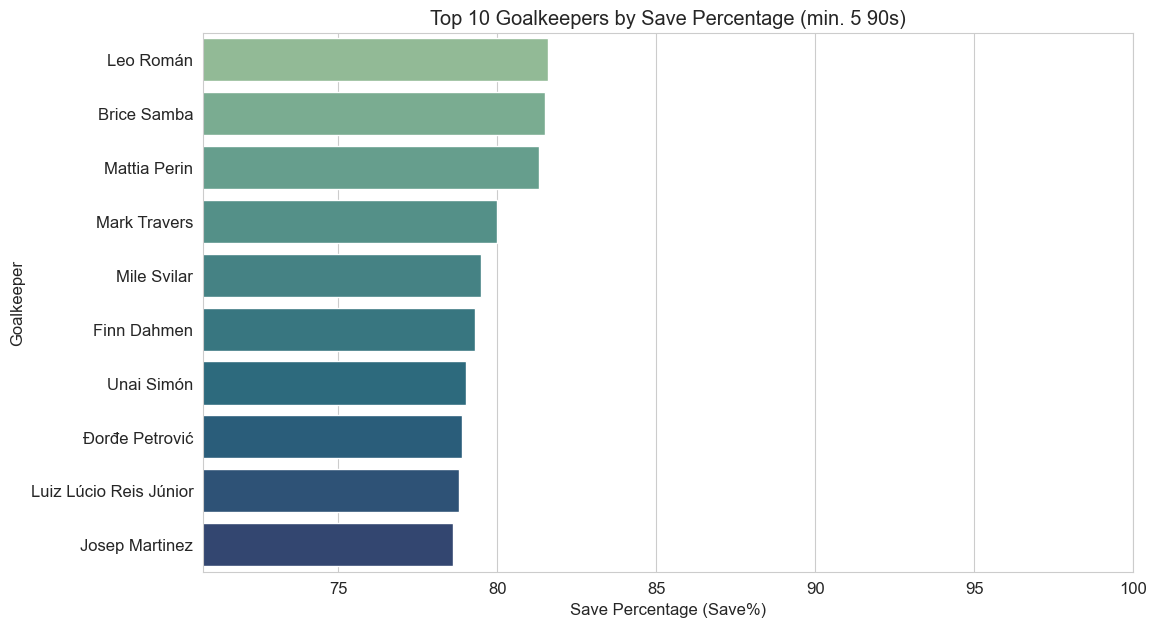

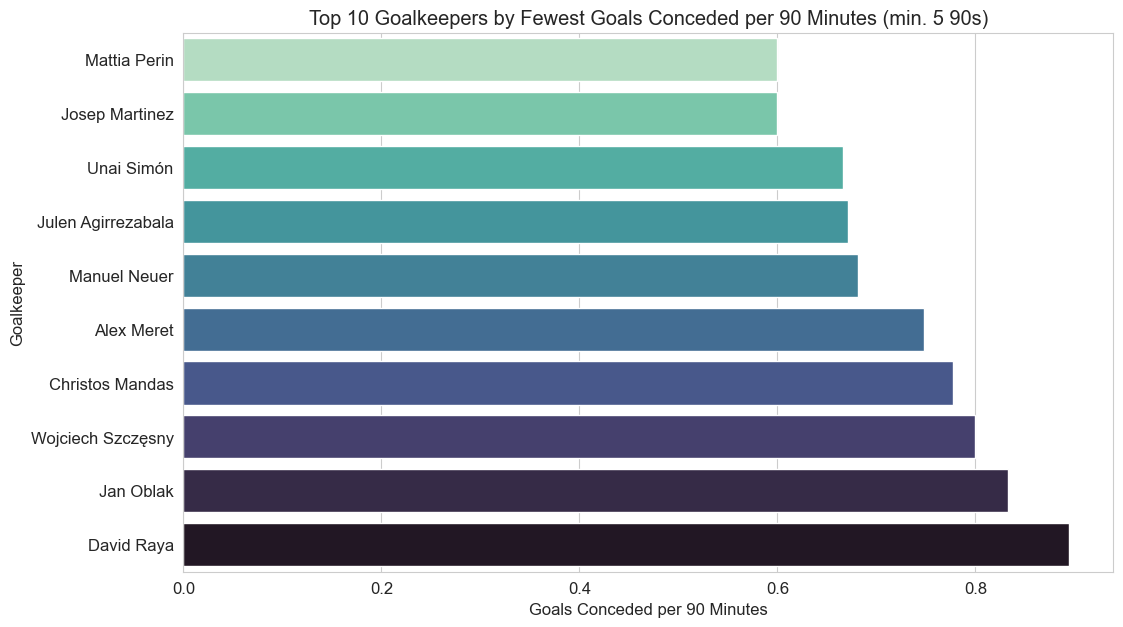

In [177]:
top_gk_saves = df_gk_filtered.sort_values(by='Save%', ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x='Save%', y='Player', data=top_gk_saves, hue='Player', palette='crest', legend=False)
plt.title(f'Top 10 Goalkeepers by Save Percentage (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Save Percentage (Save%)')
plt.ylabel('Goalkeeper')
plt.xlim(top_gk_saves['Save%'].min() * 0.9, 100)
plt.show()

top_gk_ga90 = df_gk_filtered.sort_values(by='GA_per_90', ascending=True).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x='GA_per_90', y='Player', data=top_gk_ga90, hue='Player', palette='mako_r', legend=False) # _r reverses the palette
plt.title(f'Top 10 Goalkeepers by Fewest Goals Conceded per 90 Minutes (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Goals Conceded per 90 Minutes')
plt.ylabel('Goalkeeper')
plt.show()

### SoT vs. Save% Comparison
Visualizamos la relación entre la cantidad de tiros a puerta enfrentados (SoT) y el porcentaje de atajadas (Save%), para contextualizar el rendimiento del portero.

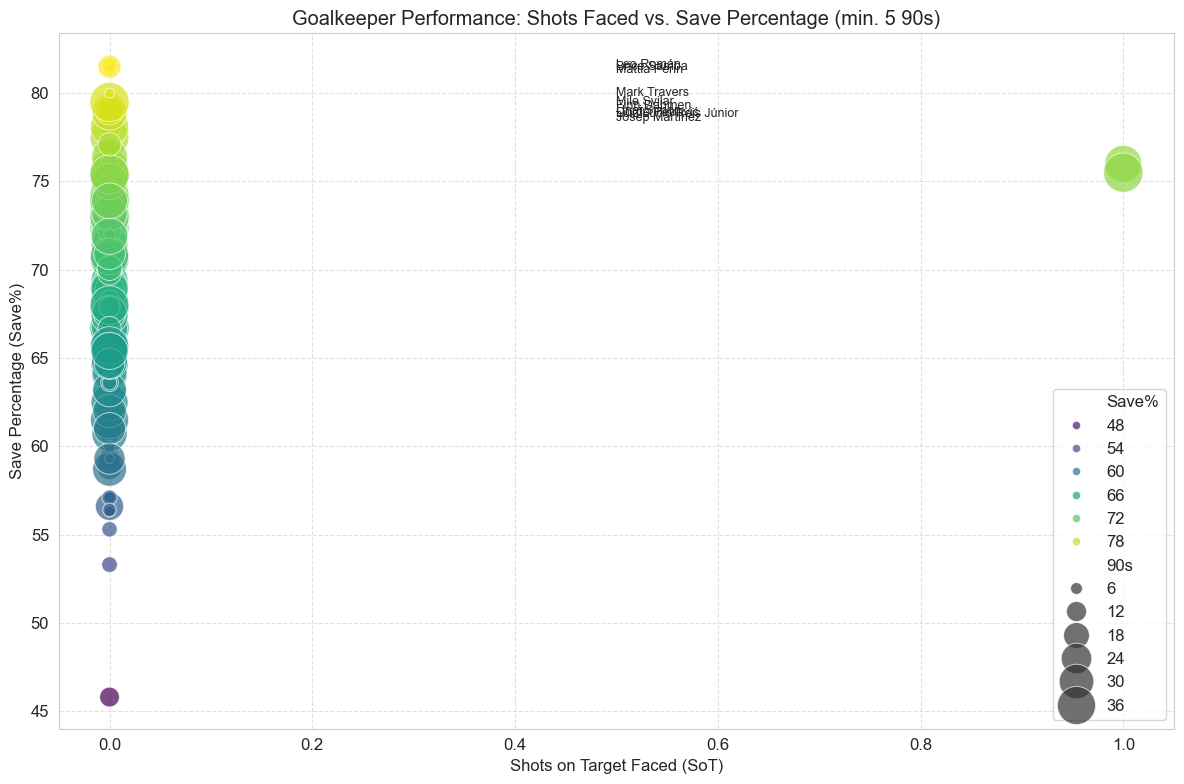

In [182]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='SoT',
    y='Save%',
    size='90s',
    sizes=(50, 800),
    hue='Save%',
    palette='viridis',
    data=df_gk_filtered,
    legend='brief',
    alpha=0.7
)

plt.title(f'Goalkeeper Performance: Shots Faced vs. Save Percentage (min. {min_90s_gk_analysis} 90s)')
plt.xlabel('Shots on Target Faced (SoT)')
plt.ylabel('Save Percentage (Save%)')

top_gk_scatter_label = df_gk_filtered.sort_values(by=['Save%', 'SoT'], ascending=[False, False]).head(10)
for i, row in top_gk_scatter_label.iterrows():
    plt.text(row['SoT'] + 0.5, row['Save%'], row['Player'], fontsize=9, ha='left', va='center')


plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Playing Style (Distribution, #OPA/90, Launch%)
I explore distribution metrics and out-of-penalty-area actions to understand goalkeepers' playing styles.



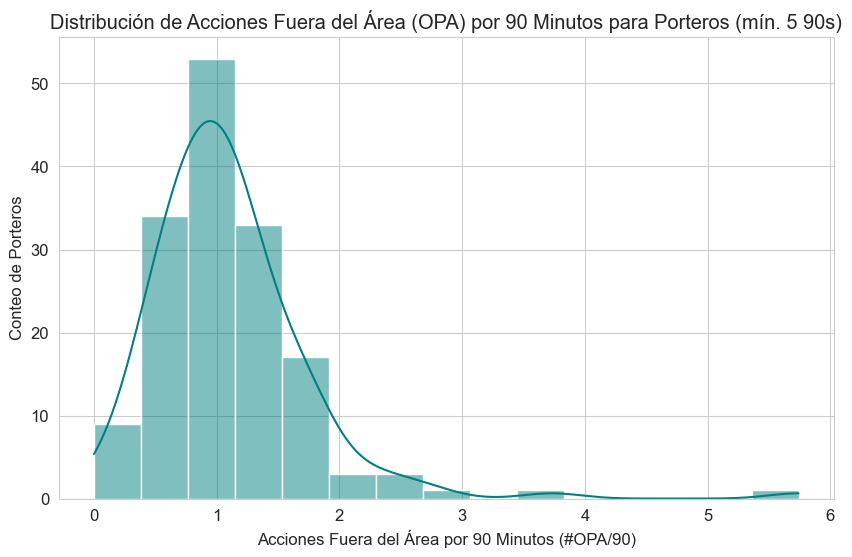

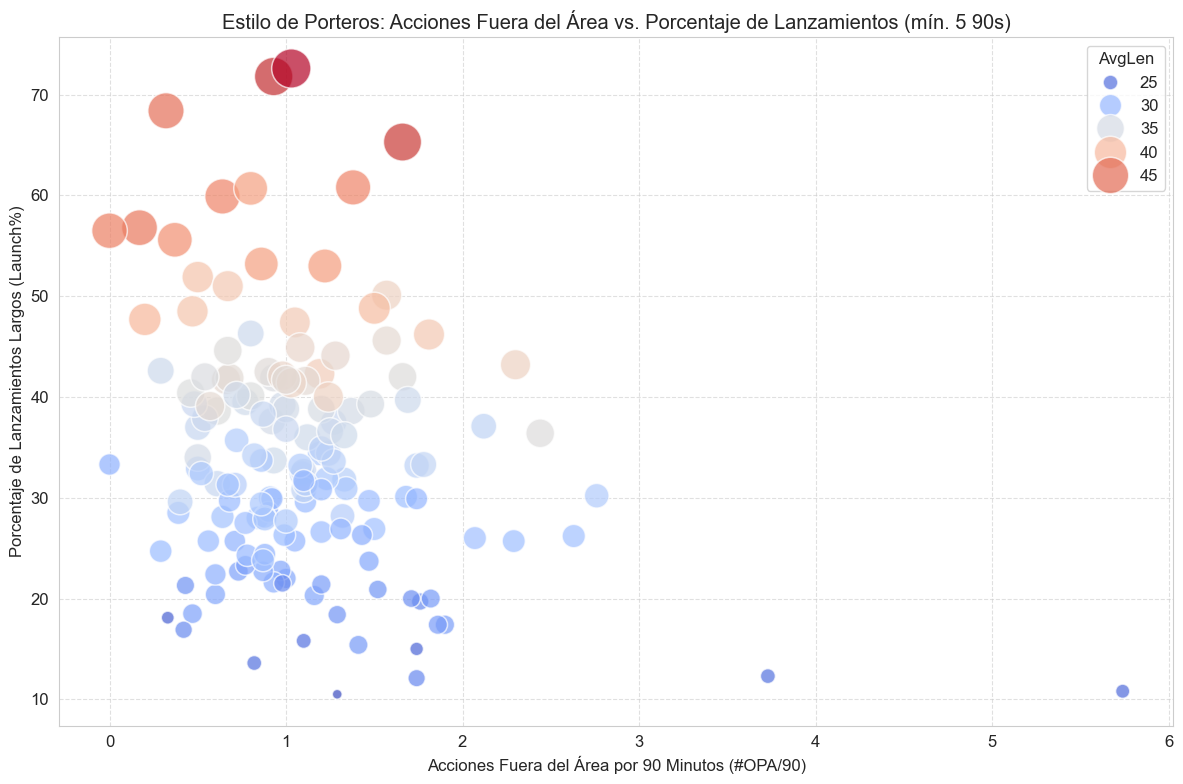

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gk_filtered['#OPA/90'], bins=15, kde=True, color='teal')
plt.title(f'Distribución de Acciones Fuera del Área (OPA) por 90 Minutos para Porteros (mín. {min_90s_gk_analysis} 90s)')
plt.xlabel('Acciones Fuera del Área por 90 Minutos (#OPA/90)')
plt.ylabel('Conteo de Porteros')
plt.show()

df_gk_filtered.dropna(subset=['Launch%', 'AvgLen'], inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='#OPA/90',
    y='Launch%',
    size='AvgLen',
    sizes=(50, 800),
    hue='AvgLen',
    palette='coolwarm',
    data=df_gk_filtered,
    legend='brief',
    alpha=0.7
)
plt.title(f'Estilo de Porteros: Acciones Fuera del Área vs. Porcentaje de Lanzamientos (mín. {min_90s_gk_analysis} 90s)')
plt.xlabel('Acciones Fuera del Área por 90 Minutos (#OPA/90)')
plt.ylabel('Porcentaje de Lanzamientos Largos (Launch%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Análisis por Posición
Comparamos la distribución de diferentes métricas de rendimiento entre las posiciones principales (Delanteros, Mediocampistas, Defensas, Porteros) para identificar roles y fortalezas típicas.

In [143]:
# Filtrar por posiciones principales para mayor claridad en los gráficos
df_positions = df_full[df_full['Pos'].isin(['FW', 'MF', 'DF', 'GK'])].copy()
min_90s_pos_analysis = 5 # Umbral de minutos para análisis por posición

df_positions_filtered = df_positions[df_positions['90s'] >= min_90s_pos_analysis].copy()

# Eliminar NaNs en las métricas que se van a graficar
df_positions_filtered.dropna(subset=['Gls_per_90', 'Ast_per_90', 'Tkl_per_90', 'Int_per_90'], inplace=True)

### Distribución de Gls_per_90 por Posición
Claramente, los delanteros (FW) tienen la distribución más alta de goles por 90 minutos, lo que es esperable.

c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\jacob\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` with

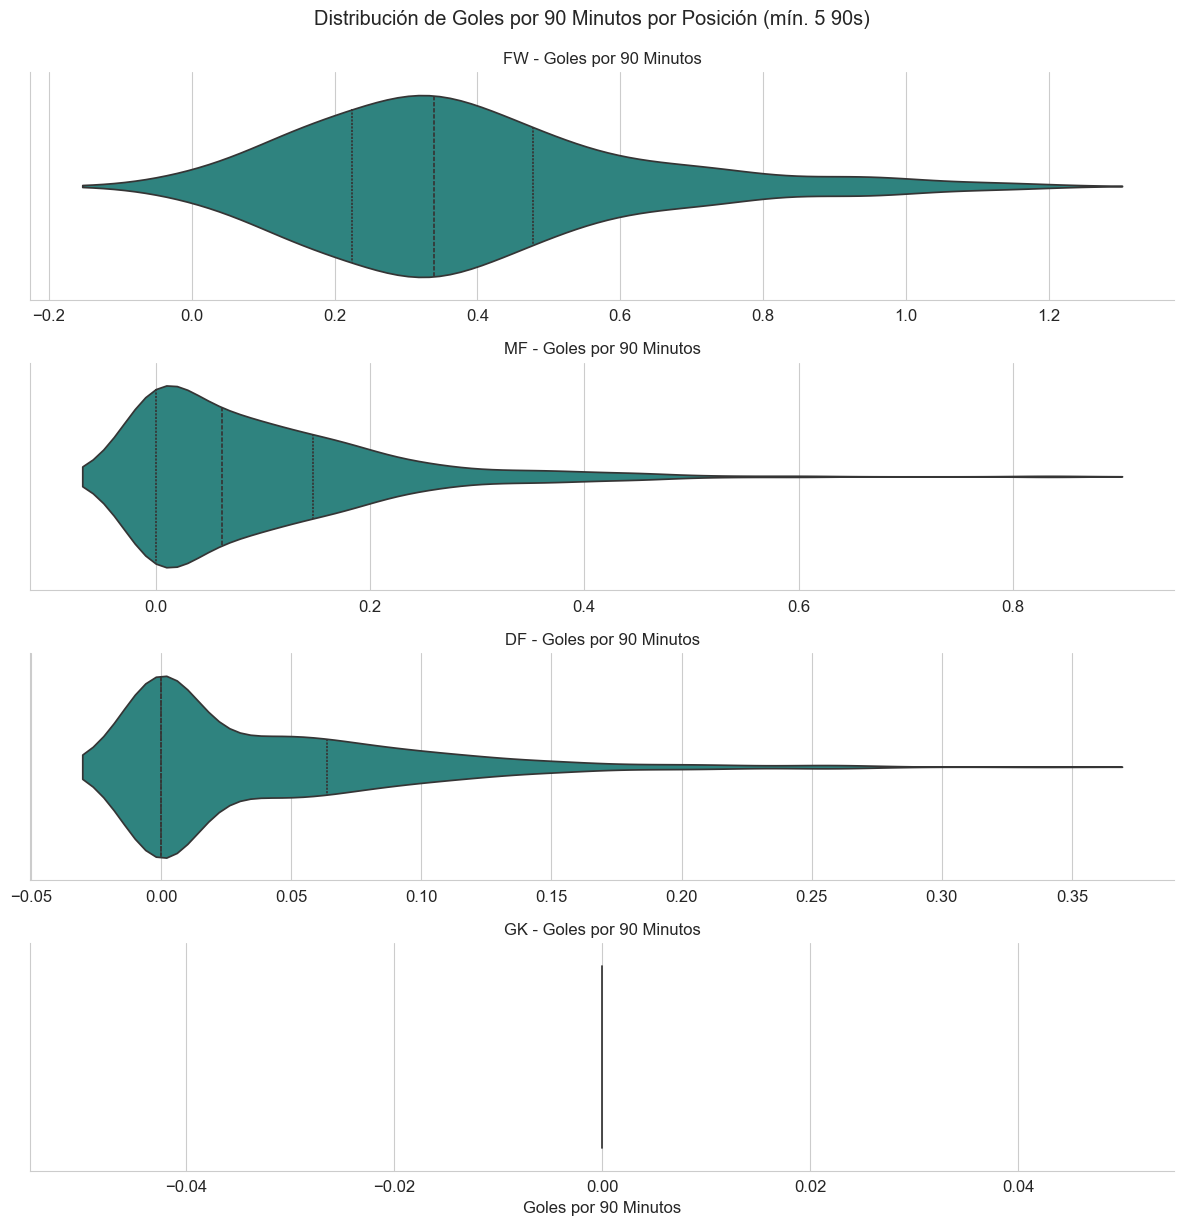

In [144]:
g_gls_pos = sns.FacetGrid(df_positions_filtered, row="Pos", height=3, aspect=4, sharex=False, row_order=['FW', 'MF', 'DF', 'GK'])
g_gls_pos.map(sns.violinplot, "Gls_per_90", palette="viridis", inner="quartile")
g_gls_pos.set_titles(row_template="{row_name} - Goles por 90 Minutos")
g_gls_pos.set_axis_labels("Goles por 90 Minutos", "")
plt.tight_layout()
plt.suptitle(f'Distribución de Goles por 90 Minutos por Posición (mín. {min_90s_pos_analysis} 90s)', y=1.02)
plt.show()